In [8]:
import numpy as np
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib
import json, math
from operator import sub
import imageio.v2 as imageio
from svgpath2mpl import parse_path
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.titley': 1.04,
    'text.latex.preamble': [r'\usepackage{amsmath}']
})

v = 27
n = 340
num_runs = 1
q_list = [100, 120, 140, 160, 180, 200]
p_list = [100, 90, 80, 70, 60, 50]
i_list = [60, 120, 180, 240, 300, 360, 420]

In [9]:
def get_data(fname):
   with open(f'../res/v{v}_parsed/{fname}', 'rb') as f:
      data = marshal.load(f)
      return data

def get_aoi_dist(protocol, i, p_o_q, nn=n):
   t = None
   p = []
   l = 'p' if protocol == 'sf' else 'q'
   for r in range(num_runs):
      data = get_data(f'{protocol}_n{nn}_i{i}_{l}{p_o_q}_r{r}_aoi_dist.dat')
      t = data['t']
      if len(p) == 0:
         p = np.array(data['p'])
      else:
         p += np.array(data['p'])

   p = p / num_runs
   return {'t': t, 'p': np.cumsum(p), 'm': np.sum(t*p)}


In [10]:
rdf_color = '#7eb0d5'
sf_color = '#fd7f6f'

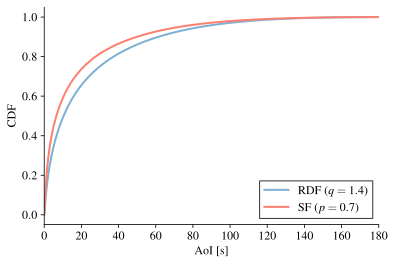

21.974984784635993
17.1729704356468


In [11]:
rdf_340 = get_aoi_dist('rdf', 180, 140)
sf_340 = get_aoi_dist('sf', 360, 70)


fig, ax = plt.subplots()


ax.plot(np.array(rdf_340['t']) / 1000, rdf_340['p'], color=rdf_color, label='RDF ($q = 1.4$)', lw=2)
ax.plot(np.array(sf_340['t']) / 1000, sf_340['p'], color=sf_color, label='SF  ($p = 0.7$)', lw=2)
# ax.grid()

ax.set_ylabel('CDF')
ax.set_xlabel('AoI [s]')
ax.set_xlim([0, 180])
# ax.set_ylim([0, 0.1])
leg = plt.legend(fancybox=False, loc="lower right", framealpha=1.0)
leg.get_frame().set_edgecolor('#333')
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

print(rdf_340['m'] / 1000)
print(sf_340['m'] / 1000)

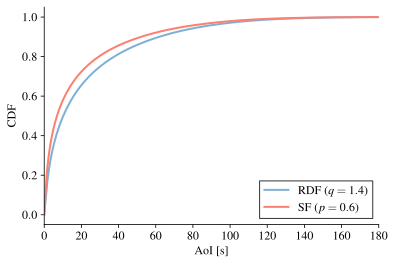

21.98319293729201
17.838048777651522


In [12]:
rdf_400 = get_aoi_dist('rdf', 180, 140, 400)
sf_400 = get_aoi_dist('sf', 420, 60, 400)


fig, ax = plt.subplots()


ax.plot(np.array(rdf_400['t']) / 1000, rdf_400['p'], color=rdf_color, label='RDF ($q = 1.4$)', lw=2)
ax.plot(np.array(sf_400['t']) / 1000, sf_400['p'], color=sf_color, label='SF ($p = 0.6$)', lw=2)
# ax.grid()

ax.set_ylabel('CDF')
ax.set_xlabel('AoI [s]')
ax.set_xlim([0, 180])
# ax.set_ylim([0, 0.1])
leg = plt.legend(fancybox=False, loc="lower right", framealpha=1.0)
leg.get_frame().set_edgecolor('#333')
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

print(rdf_400['m'] / 1000)
print(sf_400['m'] / 1000)

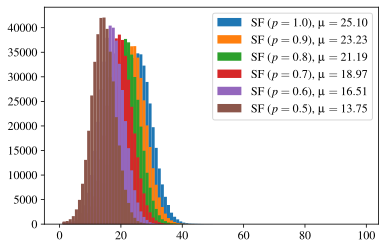

In [13]:
for p in p_list:
    data = get_data(f'sf_n480_i240_p{p}_r0_fwd_by_user_seqno_dist.dat')
    plt.hist(data, bins=np.arange(0, 100, 1), label=f"SF ($p={p/100}$), $\mu={np.mean(data):.2f}$")


#plt.hist(get_data('rdf_n260_i300_q100_r0_fwd_by_user_seqno_dist.dat'), bins=np.arange(0, 100, 1), fc=rdf_color, label="RDF")
plt.legend()
plt.show()

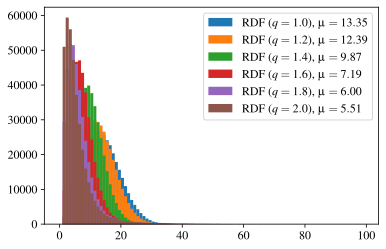

In [14]:
for q in q_list:
    data = get_data(f'rdf_n480_i240_q{q}_r0_fwd_by_user_seqno_dist.dat')
    plt.hist(data, bins=np.arange(0, 100, 1), label=f"RDF ($q={q/100}$), $\mu={np.mean(data):.2f}$")


#plt.hist(get_data('rdf_n260_i300_q100_r0_fwd_by_user_seqno_dist.dat'), bins=np.arange(0, 100, 1), fc=rdf_color, label="RDF")
plt.legend()
plt.show()

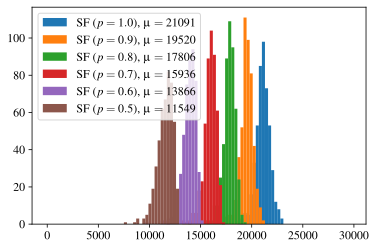

In [15]:
for p in p_list:
    data = get_data(f'sf_n480_i240_p{p}_r0_fwd_by_user_dist.dat')
    plt.hist(data, bins=np.arange(0, 30000, 300), label=f"SF ($p={p/100}$), $\mu={np.mean(data):.0f}$")


#plt.hist(get_data('rdf_n260_i300_q100_r0_fwd_by_user_seqno_dist.dat'), bins=np.arange(0, 100, 1), fc=rdf_color, label="RDF")
plt.legend()
plt.show()

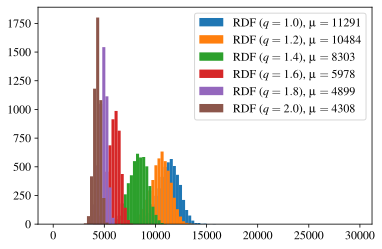

In [16]:
for q in q_list:
    data = []
    for r in range(10):
        data += get_data(f'rdf_n480_i240_q{q}_r{r}_fwd_by_user_dist.dat')
    plt.hist(data, bins=np.arange(0, 30000, 300), label=f"RDF ($q={q/100}$), $\mu={np.mean(data):.0f}$")


#plt.hist(get_data('rdf_n260_i300_q100_r0_fwd_by_user_seqno_dist.dat'), bins=np.arange(0, 100, 1), fc=rdf_color, label="RDF")
plt.legend()
plt.show()

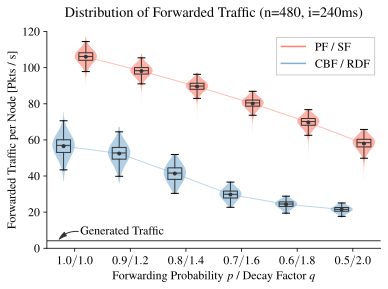

In [40]:
n =480#260#480
ival = 240#300#240

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#333"
RED_DARK = "#850e00"

POSITIONS = np.array([1,2,3,4,5,6]) *2
STEP = 0.4

medianprops = dict(
    linewidth=1, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=1, 
    color=GREY_DARK
)

meanprops = dict(marker='.', markeredgecolor='#333',
                      markerfacecolor='#333')


fig, ax = plt.subplots()
y_data_rdf = []
y_data_sf = []

for i,q in enumerate(q_list):
    data = []
    for r in range(10):
        data = get_data(f'rdf_n{n}_i{ival}_q{q}_r{r}_fwd_by_user_dist.dat')
    y_data_rdf.append(np.array(data) / 200)

for i,p in enumerate(p_list):
    data = []
    for r in range(10):
        data += get_data(f'sf_n{n}_i{ival}_p{p}_r{r}_fwd_by_user_dist.dat')
    y_data_sf.append(np.array(data) / 200)


rdf_means = [np.mean(d) for d in y_data_rdf]
sf_means = [np.mean(d) for d in y_data_sf]

ax.plot(POSITIONS - STEP, rdf_means, lw=1, color=rdf_color, alpha=0.5)
ax.plot(POSITIONS + STEP, sf_means, lw=1, color=sf_color, alpha=0.5)

plt.boxplot(
    y_data_rdf, 
    positions=POSITIONS - STEP,
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = True,   # Do not show the caps
    medianprops = medianprops,
    showmeans=True,
    whiskerprops = boxprops,
    meanprops=meanprops,
    boxprops = boxprops
)

violins = ax.violinplot(
    y_data_rdf, 
    positions=POSITIONS - STEP,
    widths=0.8,
    bw_method=0.8,
    showmeans=False, 
    showmedians=False,
    showextrema=False
)
for pc in violins["bodies"]:
    pc.set_facecolor(rdf_color)
    pc.set_edgecolor('#333')
    pc.set_linewidth(0)
    pc.set_alpha(0.6)


plt.boxplot(
    y_data_sf, 
    positions=POSITIONS + STEP,
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = True,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    meanprops=meanprops,
    showmeans=True,
    boxprops = boxprops
)

violins = ax.violinplot(
    y_data_sf, 
    positions=POSITIONS + STEP,
    widths=0.8,
    bw_method=0.8,
    showmeans=False, 
    showmedians=False,
    showextrema=False
)
for pc in violins["bodies"]:
    pc.set_facecolor(sf_color)
    pc.set_edgecolor('#333')
    pc.set_linewidth(0)
    pc.set_alpha(0.6)

#plt.hist(get_data('rdf_n260_i300_q100_r0_fwd_by_user_seqno_dist.dat'), bins=np.arange(0, 100, 1), fc=rdf_color, label="RDF")

plt.plot([1,13],[1000/ival,1000/ival], color='#333', lw=1)
plt.text(2.2, 1000/ival + 5, 'Generated Traffic', ha='left', va='center')
arrow = patches.FancyArrowPatch((2.2, 1000/ival + 5), (1.4, 1000/ival), connectionstyle=f"arc3,rad=0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#333', zorder=2)
ax.add_patch(arrow)
plt.axis([1, 13, 0, 120])
y_labels = [f'${p_list[i] / 100} / {q_list[i] / 100}$' for i in range(len(q_list))]

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.title(f'Distribution of Forwarded Traffic (n={n}, i={ival}ms)')
plt.xlabel('Forwarding Probability $p$ /  Decay Factor $q$')


plt.plot(-1,-1, color=sf_color, label='PF / SF')
plt.plot(-1,-1, color=rdf_color, label='CBF / RDF')

leg = plt.legend(fancybox=False, loc="upper right", framealpha=1.0)

plt.ylabel('Forwarded Traffic per Node [Pkts / s]')
plt.xticks(POSITIONS, y_labels)
plt.show()
fig.tight_layout()
fig.savefig(f"../figures/fwd_traffic_dist_n{n}_i{ival}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/fwd_traffic_dist_n{n}_i{ival}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)


## N=260 
Watch Protocols in uncongested state


FileNotFoundError: [Errno 2] No such file or directory: '../res/v27_parsed/rdf_n480_i300_q100_r0_aoi_dist.dat'

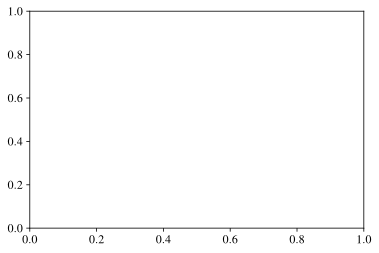

In [21]:
n = 480#480 #260
ival = 300#240 #300

fig, ax = plt.subplots()

markers = ['h', '^', 'o', 'v', 's', 'D']
marker_step = 1000

q_list = [100, 120, 140, 160, 180, 200]
p_list = [100, 90, 80, 70, 60, 50]

for i, q in enumerate(q_list):
    rdf = get_aoi_dist('rdf', ival, q, n)
    marker_start = int((i+1) * marker_step / 3)
    ax.plot(np.array(rdf['t']) / 1000, rdf['p'], color=rdf_color, lw=1)
    ax.plot(np.array(rdf['t'][marker_start::marker_step]) / 1000, rdf['p'][marker_start::marker_step], f'{markers[i]}', color=rdf_color)

for i, p in enumerate(p_list):
    sf = get_aoi_dist('sf', ival, p, n)
    marker_start = int((i+1) * marker_step / 3)
    ax.plot(np.array(sf['t']) / 1000, sf['p'], color=sf_color, lw=1)
    ax.plot(np.array(sf['t'][marker_start::marker_step]) / 1000, sf['p'][marker_start::marker_step], f'{markers[i]}', color=sf_color)




ax.plot([-1],[-1], '-', label='RDF', color=rdf_color)
ax.plot([-1],[-1], '-', label='SF', color=sf_color)

for i,m in enumerate(markers):
    ax.plot([-1],[-1], m, label=f'$p={p_list[i] / 100} / q={q_list[i] / 100}$', color='#808080')

ax.set_ylabel('ECDF')
ax.set_xlabel('AoI [s]')
ax.set_xlim([0, 180])
#ax.grid()
ax.set_ylim([0, 1.05])
plt.title(f'AoI Distribution (n={n}, i={ival}ms)')
leg = plt.legend(fancybox=False, loc="lower right", framealpha=1.0)
leg.get_frame().set_edgecolor('#333')
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

print(rdf_260['m'] / 1000)
print(sf_260['m'] / 1000)

fig.tight_layout()
fig.savefig(f"../figures/aoi_dist_n{n}_i{ival}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/aoi_dist_n{n}_i{ival}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)

# Other Distributions